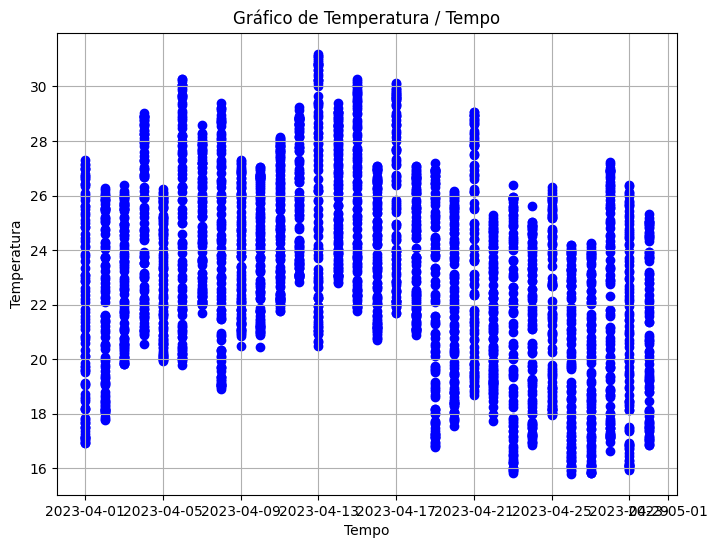

In [4]:
#A) Podemos notar que a coluna de data está formatada incorretamente. Utilize funções do pandas para convertê-la para o formato datetime.

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/dataset1.csv')

df[['semana', '-', 'dia' , 'hora']] = df['data'].str.split( ' ', expand = True)
df = df.drop(['data'] , axis = 1)
df = df.drop(['-'], axis =1)
df['dia'] = pd.to_datetime(df['dia'] ,dayfirst=True)

#B) Esboce um gráfico da temperatura em função do tempo. O que você percebe analisando esse gráfico?

plt.figure(figsize = (8, 6))

plt.scatter( df['dia'], df['temperatura'] , color = "blue")

# Legenda


# Titulo
plt.title("Gráfico de Temperatura / Tempo")

# Nome dos eixos
plt.xlabel("Tempo")
plt.ylabel("Temperatura")

# Grid
plt.grid()

plt.show()

dia
1     21.859053
2     21.924565
3     23.008211
4     24.929362
5     23.035161
6     24.915484
7     24.953763
8     23.869149
9     23.966044
10    23.949247
11    24.951383
12    25.956421
13    25.895699
14    26.026703
15    25.854149
16    23.946774
17    25.991368
18    23.963587
19    21.979479
20    21.876170
21    23.962128
22    21.475319
23    20.977033
24    21.037447
25    22.040440
26    20.009362
27    19.896333
28    21.969792
29    20.892688
30    20.949783
Name: temperatura, dtype: float64


<Axes: xlabel='dia'>

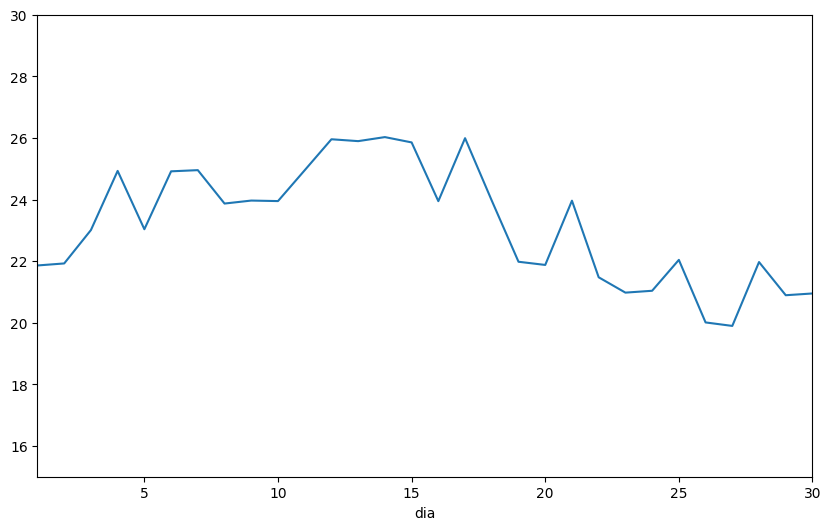

In [5]:
agrup_dia = df.groupby(df['dia'].dt.day)['temperatura'].mean()
print(agrup_dia)
plt.figure(figsize = (10, 6))
plt.xlim([1, 30])
plt.ylim([15, 30])
df.groupby(df['dia'].dt.day)['temperatura'].mean().plot()

RESPOSTA QUESTÃO B: Nota-se uma tendencia crescente no gráfico até quase a metade dos dias e depois uma queda nas temperaturas.

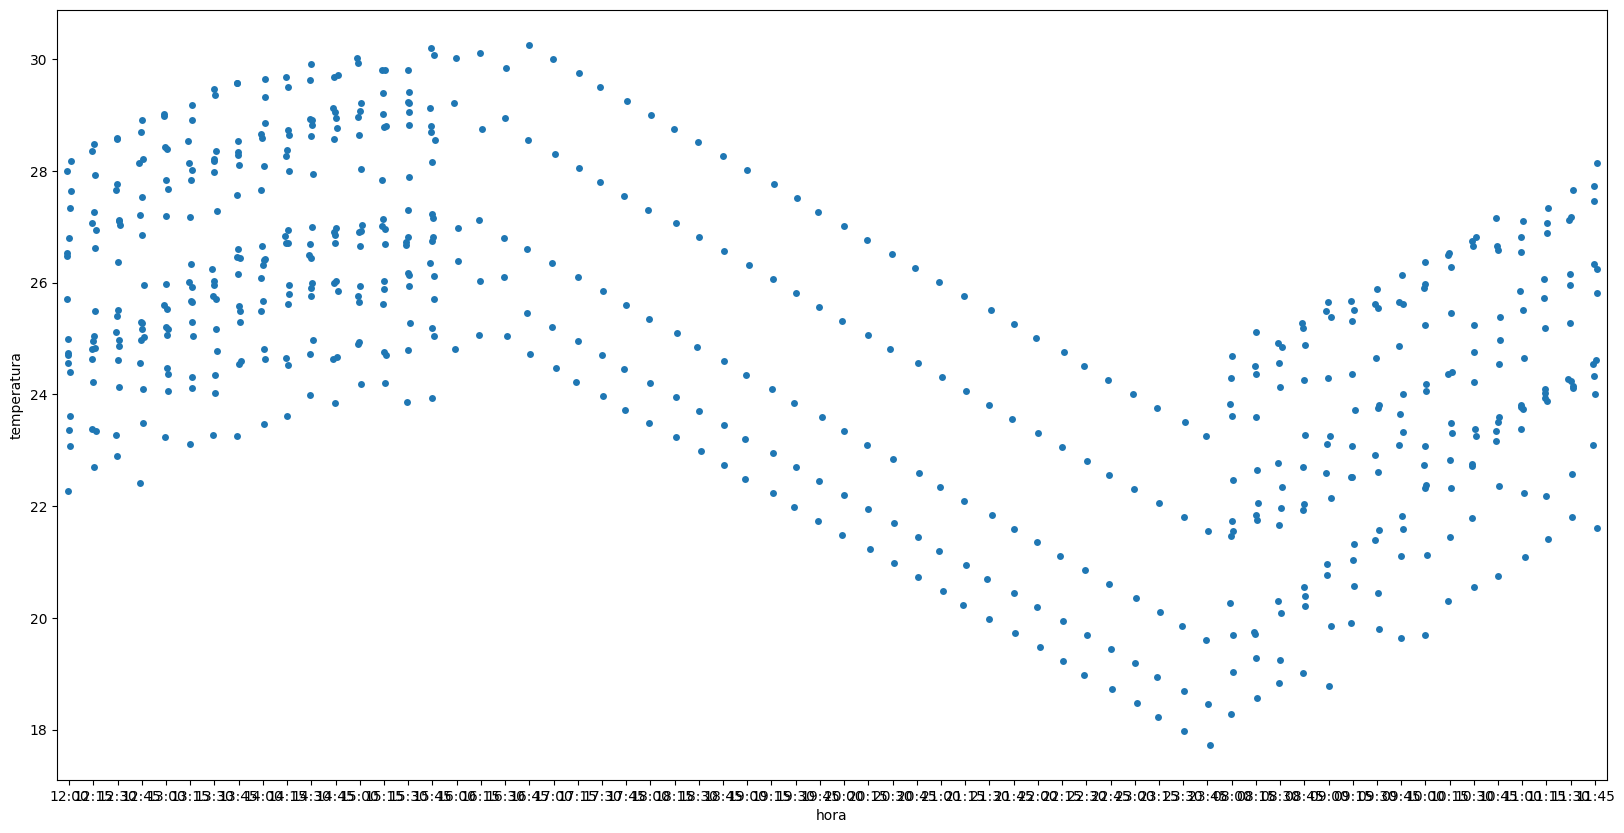

In [7]:
# John identificou que os dados enviados por um dos estudantes apresentou um comportamento suspeito. Você consegue identificá-lo?

import seaborn as sns

df_fernando = df[df['responsável'] == 'Fernando']

plt.figure(figsize = (20, 10))


sns.stripplot(x="hora", y="temperatura", data=df_fernando)

plt.show()

#Muitas das temperaturas coletadas pelo Fernando tem uma repetição incomum nos decimais enquanto a temperatura vai caindo um grau.

In [8]:
df.loc[739 : 767]

,responsável,temperatura,semana,dia,hora
739,Fernando,28.56,sábado,2023-04-08,16:45
740,Fernando,28.31,sábado,2023-04-08,17:00
741,Fernando,28.06,sábado,2023-04-08,17:15
742,Fernando,27.81,sábado,2023-04-08,17:30
743,Fernando,27.56,sábado,2023-04-08,17:45
744,Fernando,27.31,sábado,2023-04-08,18:00
745,Fernando,27.06,sábado,2023-04-08,18:15
746,Fernando,26.81,sábado,2023-04-08,18:30
747,Fernando,26.56,sábado,2023-04-08,18:45
748,Fernando,26.31,sábado,2023-04-08,19:00


In [9]:
# O dataset apresenta diversos valores ausentes de temperatura. Determine um método adequado para lidar com esses dados. (Dica: considere implementar uma solução de imputação com base em séries temporais.)

df["Forward_Fill"] = df["temperatura"].ffill(inplace = True)
df = df.drop(['Forward_Fill'] , axis = 1)

In [12]:
# Qual foi a quarta-feira mais fria do mês? Isto é, com a menor temperatura mínima? Qual foi essa temperatura?

temperatura_minima = df['temperatura'].min()

print("A temperatura mais baixa do dataset é:", temperatura_minima , 'da quarta feira do dia 26/04')

#A quarta feira mais fria foi a do dia:  , com temperatura mínima de


A temperatura mais baixa do dataset é: 15.8 da quarta feira do dia 26/04


<ipython-input-10-f5177f3fa742>:7: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_medmax = (df.groupby(df['dia'].dt.date)['temperatura'].max().round(1).reset_index()).mean().round(1)
<ipython-input-10-f5177f3fa742>:18: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_medmin = (df.groupby(df['dia'].dt.date)['temperatura'].min().round(1).reset_index()).mean().round(1)


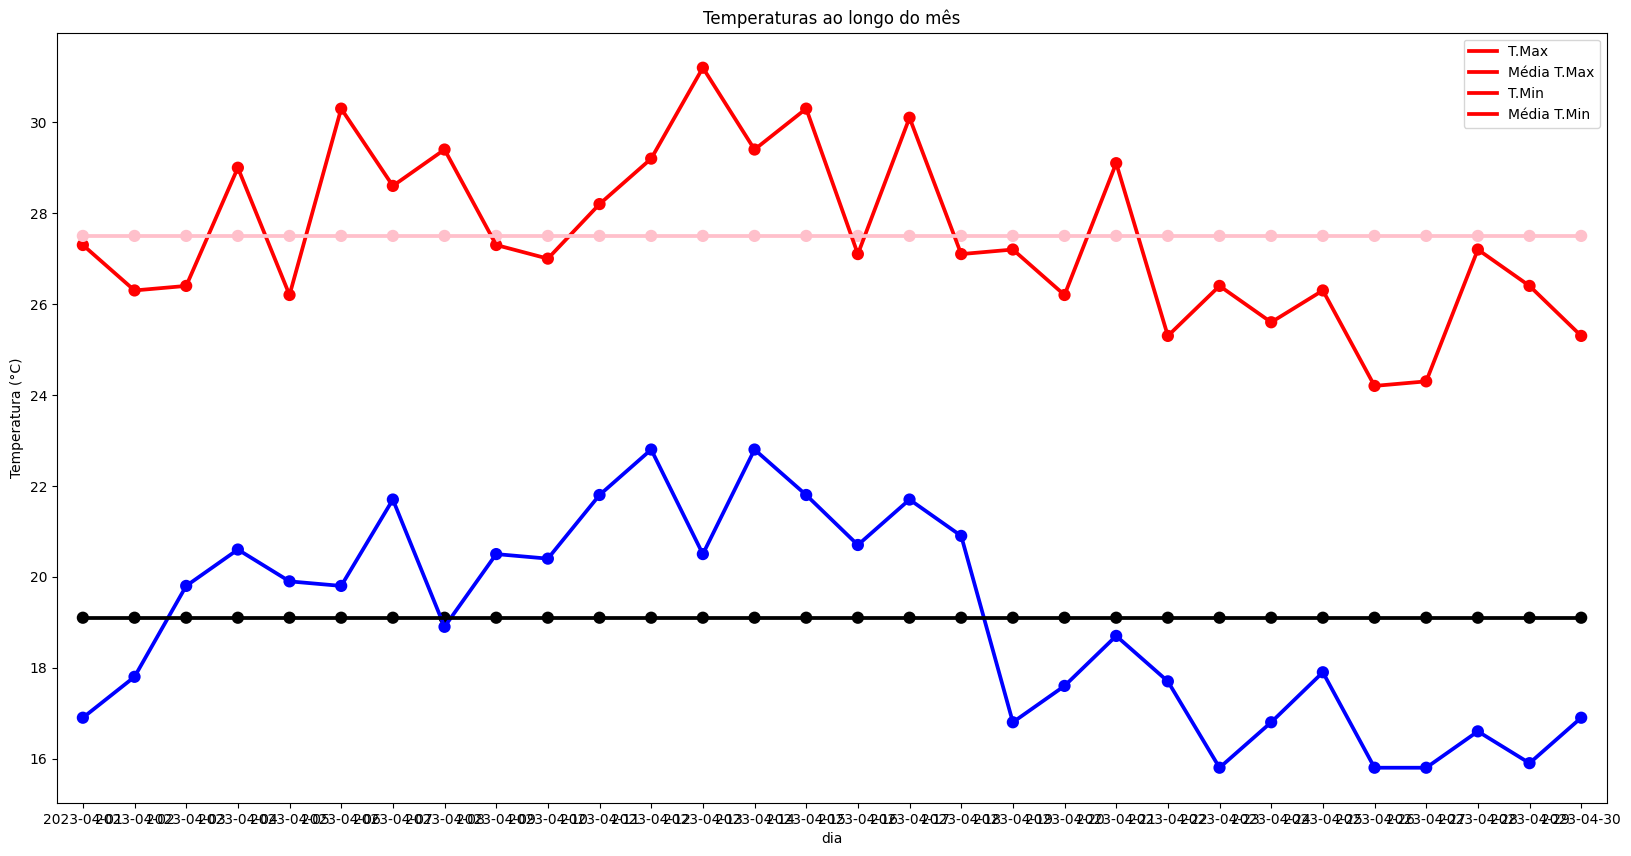

In [10]:
# Por fim, construa um gráfico como o abaixo, para as temperaturas máximas e mínimas ao longo do mês.

df_min = df.groupby(df['dia'].dt.date)['temperatura'].min().round(1).reset_index()
dfMi = pd.DataFrame(df_min)
df_max = df.groupby(df['dia'].dt.date)['temperatura'].max().round(1).reset_index()
dfM = pd.DataFrame(df_max)
df_medmax = (df.groupby(df['dia'].dt.date)['temperatura'].max().round(1).reset_index()).mean().round(1)

dfM.insert(0, "MedMax", [df_medmax['temperatura'],df_medmax['temperatura'],df_medmax['temperatura'],df_medmax['temperatura'],
                         df_medmax['temperatura'],df_medmax['temperatura'],df_medmax['temperatura'],df_medmax['temperatura'],
                         df_medmax['temperatura'],df_medmax['temperatura'],df_medmax['temperatura'],df_medmax['temperatura'],
                         df_medmax['temperatura'],df_medmax['temperatura'],df_medmax['temperatura'],df_medmax['temperatura'],
                         df_medmax['temperatura'],df_medmax['temperatura'],df_medmax['temperatura'],df_medmax['temperatura'],
                         df_medmax['temperatura'],df_medmax['temperatura'],df_medmax['temperatura'],df_medmax['temperatura'],
                         df_medmax['temperatura'],df_medmax['temperatura'],df_medmax['temperatura'],df_medmax['temperatura'],
                         df_medmax['temperatura'],df_medmax['temperatura']], True)

df_medmin = (df.groupby(df['dia'].dt.date)['temperatura'].min().round(1).reset_index()).mean().round(1)


dfMi.insert(0, "MedMin", [df_medmin['temperatura'],df_medmin['temperatura'],df_medmin['temperatura'],df_medmin['temperatura'],
                         df_medmin['temperatura'],df_medmin['temperatura'],df_medmin['temperatura'],df_medmin['temperatura'],
                         df_medmin['temperatura'],df_medmin['temperatura'],df_medmin['temperatura'],df_medmin['temperatura'],
                         df_medmin['temperatura'],df_medmin['temperatura'],df_medmin['temperatura'],df_medmin['temperatura'],
                         df_medmin['temperatura'],df_medmin['temperatura'],df_medmin['temperatura'],df_medmin['temperatura'],
                         df_medmin['temperatura'],df_medmin['temperatura'],df_medmin['temperatura'],df_medmin['temperatura'],
                         df_medmin['temperatura'],df_medmin['temperatura'],df_medmin['temperatura'],df_medmin['temperatura'],
                         df_medmin['temperatura'],df_medmin['temperatura']], True)


import seaborn as sns


plt.figure(figsize=(20,10))
sns.pointplot(x = dfM['dia'] , y = dfM['temperatura'] , color = 'red')
sns.pointplot(x = dfM['dia'] , y= dfM['MedMax'] , color = 'pink')
sns.pointplot(x = dfMi['dia'] , y = dfMi['temperatura'] , color = 'blue')
sns.pointplot(x= dfMi['dia'] , y= dfMi['MedMin'], color = 'black')

# Legenda
plt.legend(["T.Max", "Média T.Max" , "T.Min" , 'Média T.Min'])

# Titulo
plt.title("Temperaturas ao longo do mês")

# Nome dos eixos

plt.ylabel("Temperatura (°C)")

plt.show()